In [1]:
import tensorflow as tf
from tensorflow import keras
from model import build_model
import numpy 
import cv2
import matplotlib.pyplot as plt

2022-11-17 17:38:14.594615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 17:38:14.705528: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 17:38:15.181392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib:/usr/local/cuda/lib64::/usr/local/cuda/lib64
2022-11-17 17:38:15.181443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'

In [2]:
IMAGE_SIZE = (128,128)
BATCH_SIZE = 64

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-11-17 17:38:15.994764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.011884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.012061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
training_data_path = './data/train/'
test_data_path = "./data/val/"

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  training_data_path,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)


val_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_path,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)


2022-11-17 17:38:16.038247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 411 files belonging to 4 classes.
Found 204 files belonging to 4 classes.


2022-11-17 17:38:16.038715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.038856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.038948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.416852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 17:38:16.417002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [6]:
train_ds.class_names

['0', '1', '2', '3']

In [7]:
model = build_model((128,128,3))

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496 

In [9]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10,
    decay_rate=0.9)

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
model.compile(optimizer = optimizer , loss = loss , metrics=metrics)

In [11]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./checkpoints",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [14]:
history = model.fit(train_ds , epochs = 200 , validation_data=val_ds ,callbacks=[model_checkpoint_callback] )

Epoch 1/200


2022-11-17 17:38:57.676605: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2022-11-17 17:38:58.199817: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


7/7 [==============================] - 3s 138ms/step - loss: 1.2416 - accuracy: 0.4964 - val_loss: 10828.8516 - val_accuracy: 0.2500
Epoch 2/200
7/7 [==============================] - 1s 72ms/step - loss: 0.6575 - accuracy: 0.7372 - val_loss: 9270.9795 - val_accuracy: 0.2451
Epoch 3/200
7/7 [==============================] - 0s 69ms/step - loss: 0.4060 - accuracy: 0.8759 - val_loss: 3596.3135 - val_accuracy: 0.2108
Epoch 4/200
7/7 [==============================] - 1s 78ms/step - loss: 0.2637 - accuracy: 0.9294 - val_loss: 1711.1819 - val_accuracy: 0.2059
Epoch 5/200
7/7 [==============================] - 1s 70ms/step - loss: 0.2102 - accuracy: 0.9367 - val_loss: 1028.5726 - val_accuracy: 0.2255
Epoch 6/200
7/7 [==============================] - 0s 69ms/step - loss: 0.2048 - accuracy: 0.9513 - val_loss: 605.4528 - val_accuracy: 0.1912
Epoch 7/200
7/7 [==============================] - 0s 69ms/step - loss: 0.1439 - accuracy: 0.9586 - val_loss: 320.0960 - val_accuracy: 0.2108
Epoch 8/200

Epoch 59/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9853
Epoch 60/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.0781 - val_accuracy: 0.9853
Epoch 61/200
7/7 [==============================] - 1s 79ms/step - loss: 0.0192 - accuracy: 0.9976 - val_loss: 0.0772 - val_accuracy: 0.9804
Epoch 62/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9804
Epoch 63/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9804
Epoch 64/200
7/7 [==============================] - 0s 70ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9804
Epoch 65/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0176 - accuracy: 0.9976 - val_loss: 0.0729 - val_accuracy: 0.9804
Epoch 66/200


Epoch 117/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 0.0613 - val_accuracy: 0.9902
Epoch 118/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0613 - val_accuracy: 0.9902
Epoch 119/200
7/7 [==============================] - 1s 73ms/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.0613 - val_accuracy: 0.9902
Epoch 120/200
7/7 [==============================] - 1s 73ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9902
Epoch 121/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9902
Epoch 122/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0163 - accuracy: 0.9976 - val_loss: 0.0614 - val_accuracy: 0.9902
Epoch 123/200
7/7 [==============================] - 1s 76ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9902
Epoch 

Epoch 175/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9902
Epoch 176/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9902
Epoch 177/200
7/7 [==============================] - 1s 76ms/step - loss: 0.0119 - accuracy: 0.9976 - val_loss: 0.0609 - val_accuracy: 0.9902
Epoch 178/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9902
Epoch 179/200
7/7 [==============================] - 0s 70ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0610 - val_accuracy: 0.9902
Epoch 180/200
7/7 [==============================] - 0s 69ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9902
Epoch 181/200
7/7 [==============================] - 0s 69ms/step - loss: 0.0227 - accuracy: 0.9951 - val_loss: 0.0608 - val_accuracy: 0.9902
Epoch 

In [16]:
model.evaluate(val_ds)

4/4 [==============================] - 0s 19ms/step - loss: 0.0612 - accuracy: 0.9902


[0.06115288287401199, 0.9901960492134094]

In [17]:
test_data_dir = "./data/test/"

In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 208 files belonging to 4 classes.


/home/ahmed/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [19]:
model.evaluate(test_ds)

4/4 [==============================] - 0s 25ms/step - loss: 0.1425 - accuracy: 0.9712


[0.14250850677490234, 0.9711538553237915]

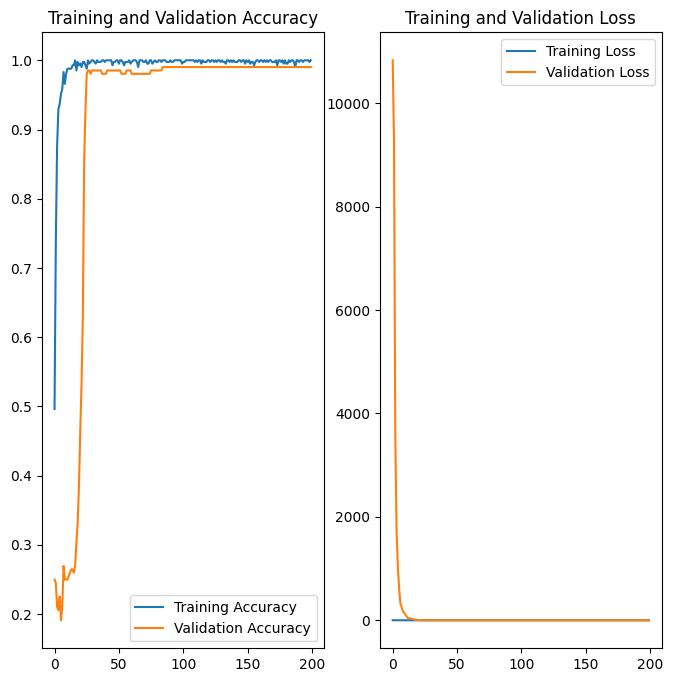

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
prediction = tf.argmax(model.predict(val_ds),axis=1)

4/4 [==============================] - 0s 13ms/step


In [23]:
print(prediction)

tf.Tensor(
[1 2 0 3 0 3 3 0 2 1 2 3 0 1 2 1 1 1 0 3 0 1 0 3 3 2 1 2 3 0 2 0 3 2 1 3 2
 3 0 1 1 3 0 0 1 0 1 3 0 2 0 3 1 2 2 0 2 3 3 2 2 1 1 0 2 3 0 0 0 0 1 2 3 3
 3 3 2 0 1 2 2 0 2 1 2 1 0 1 1 2 0 0 2 2 1 2 3 3 3 0 2 1 1 2 0 0 3 3 1 3 1
 1 1 2 3 2 0 0 3 2 1 0 0 2 0 2 1 2 2 2 1 2 0 2 0 3 1 1 2 1 3 1 3 0 3 2 2 1
 1 0 0 2 1 1 0 3 3 3 3 2 2 0 1 1 3 3 0 2 1 3 2 2 3 3 1 0 1 2 3 0 1 0 0 0 2
 1 3 3 2 0 2 1 3 0 3 0 1 1 1 3 1 0 3 3], shape=(204,), dtype=int64)


In [24]:
print(val_ds.list_files)

<function DatasetV2.list_files at 0x7f3654168f70>


In [ ]:
import numpy as np

In [ ]:
pred = np.array(prediction)

In [ ]:
labels = np.array(validation_data.data_format)

In [ ]:
test_data.labels

In [ ]:
pred

In [ ]:
image , label = next(validation_data)

In [ ]:
label